## 행정 구역 정보
- read_csv() 함수로 csv file read
- 특정 행과 열 선택
- 컬럼명 변경
- 상관관계 분석 (인구수와 면적간의 상관관계)
- 시각화

In [17]:
import pandas as pd

data = pd.read_csv('data/data_draw_korea.csv')
print(type(data))
data.head()

<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시


In [18]:
data.tail()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
224,224,127462,제천,8,10,882.47,충청북도,제천시
225,225,34480,증평,6,11,81.84,충청북도,증평군
226,226,62809,진천,5,11,406.08,충청북도,진천군
227,227,790216,청주,6,12,932.51,충청북도,청주시
228,228,198077,충주,6,10,983.70,충청북도,충주시


In [19]:
data.sample(3)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
174,174,38705,보성,3,21,663.16,전라남도,보성군
104,104,236524,대전동구,5,13,136.80,대전광역시,동구
86,86,38571,청도,8,13,696.52,경상북도,청도군


In [20]:
print(data.shape)
print(data.columns)
print(data.index)

(229, 8)
Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')
RangeIndex(start=0, stop=229, step=1)


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  229 non-null    int64  
 1   인구수         229 non-null    int64  
 2   shortName   229 non-null    object 
 3   x           229 non-null    int64  
 4   y           229 non-null    int64  
 5   면적          229 non-null    float64
 6   광역시도        229 non-null    object 
 7   행정구역        229 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 14.4+ KB


In [22]:
data.describe()

,Unnamed: 0,인구수,x,y,면적
count,229.000000,2.290000e+02,229.000000,229.000000,229.000000
mean,114.000000,2.110898e+05,6.117904,11.262009,435.419795
std,66.250786,2.074378e+05,3.320469,6.040898,381.612549
min,0.000000,8.392000e+03,0.000000,0.000000,2.800000
25%,57.000000,4.955900e+04,3.000000,6.000000,54.000000
50%,114.000000,1.401590e+05,6.000000,11.000000,436.400000
75%,171.000000,3.216180e+05,9.000000,16.000000,692.800000
max,228.000000,1.125461e+06,13.000000,25.000000,1817.940000


In [23]:
print('인구수 최대값 ',data['인구수'].max())
print('인구수 최소값 ',data['인구수'].min())
print('인구수 평균값 ',data['인구수'].mean())
print('인구수 표준편차값 ',data['인구수'].std())

인구수 최대값  1125461
인구수 최소값  8392
인구수 평균값  211089.77729257641
인구수 표준편차값  207437.8370475227


In [24]:
#unique한 광역시도명
data['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [25]:
#광역시도 값 row counting
data['광역시도'].value_counts()

경기도        31
서울특별시      25
경상북도       23
전라남도       22
강원도        18
경상남도       18
부산광역시      16
충청남도       15
전라북도       14
충청북도       11
인천광역시      10
대구광역시       8
대전광역시       5
광주광역시       5
울산광역시       5
제주특별자치도     2
세종특별자치시     1
Name: 광역시도, dtype: int64

In [26]:
#서울특별시에 속한 구에 대한 정보 선택하기
#입력으로 광역시도 이름을 받아서 광역시도에 속한 행정구역정보를 반환하는 함수 만들기
data.loc[data['광역시도'] == '서울특별시'].sort_values(by='인구수',ascending=False).reset_index(drop=True)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,141,615487,서울송파,8,6,33.90,서울특별시,송파구
1,127,554709,서울강서,4,4,41.40,서울특별시,강서구
2,132,547202,서울노원,6,1,35.44,서울특별시,노원구
3,124,526157,서울강남,6,7,39.50,서울특별시,강남구
4,128,484478,서울관악,5,6,29.60,서울특별시,관악구
5,145,464236,서울은평,4,3,29.70,서울특별시,은평구
6,142,453634,서울양천,4,5,17.40,서울특별시,양천구
7,140,434061,서울성북,6,2,24.57,서울특별시,성북구
8,125,432028,서울강동,8,5,24.60,서울특별시,강동구
9,138,407416,서울서초,6,6,47.04,서울특별시,서초구


In [27]:
#서울특별시의 인구수의 평균과 표준편차
print('인구수 평균', data.loc[data['광역시도'] == '서울특별시','인구수'].mean())
print('인구수 표준편차',data.loc[data['광역시도'] == '서울특별시','인구수'].std())

인구수 평균 375792.28
인구수 표준편차 125231.24797500289


In [28]:
#경기도의 인구수의 평균과 표준편차를 출력하시오 (함수로 만들어서 출력하기)
#경기도와 서울특별시의 인구수의 표준편차가 어느지역이 더 큰가요? 표준편차가 더 크다면 어떤 의미인지 생각해보기
def print_mean_std(sido_name):
    print(f'광역시도 = {sido_name}')
    print('인구수 평균', data.loc[data['광역시도'] == sido_name,'인구수'].mean())
    print('인구수 표준편차',data.loc[data['광역시도'] == sido_name,'인구수'].std())

In [29]:
print_mean_std('경기도')

광역시도 = 경기도
인구수 평균 378845.48387096776
인구수 표준편차 304548.39514203876


In [30]:
for sido_name in data['광역시도'].unique():
    print_mean_std(sido_name)

광역시도 = 강원도
인구수 평균 79413.22222222222
인구수 표준편차 87316.38323837094
광역시도 = 경기도
인구수 평균 378845.48387096776
인구수 표준편차 304548.39514203876
광역시도 = 경상남도
인구수 평균 174693.72222222222
인구수 표준편차 245796.4650767224
광역시도 = 경상북도
인구수 평균 109085.39130434782
인구수 표준편차 124954.74088490057
광역시도 = 광주광역시
인구수 평균 287641.8
인구수 표준편차 137076.68320578814
광역시도 = 대구광역시
인구수 평균 297306.25
인구수 표준편차 174375.39437968715
광역시도 = 대전광역시
인구수 평균 293535.4
인구수 표준편차 111853.57188217103
광역시도 = 부산광역시
인구수 평균 207724.4375
인구수 표준편차 106246.04138380481
광역시도 = 서울특별시
인구수 평균 375792.28
인구수 표준편차 125231.24797500289
광역시도 = 세종특별자치시
인구수 평균 191233.0
인구수 표준편차 nan
광역시도 = 울산광역시
인구수 평균 221117.0
인구수 표준편차 64163.28658196991
광역시도 = 인천광역시
인구수 평균 276657.5
인구수 표준편차 199353.5964908417
광역시도 = 전라남도
인구수 평균 77298.31818181818
인구수 표준편차 74413.25322969875
광역시도 = 전라북도
인구수 평균 124217.71428571429
인구수 표준편차 168327.13482128442
광역시도 = 제주특별자치도
인구수 평균 287936.5
인구수 표준편차 201620.89205362622
광역시도 = 충청남도
인구수 평균 129741.93333333333
인구수 표준편차 141125.1080796583
광역시도 = 충청북도
인구수 평균 134974.54545454544
인구수

In [31]:
data.loc[data['광역시도'] == '경상북도', ['행정구역', '인구수', '면적']].sort_values(by=['인구수', '면적'], ascending=False).reset_index(drop=True)

,행정구역,인구수,면적
0,포항시,488395,1127.00
1,구미시,396685,616.10
2,경산시,251220,411.58
3,경주시,242618,1323.85
4,안동시,157317,1519.00
5,김천시,127941,1009.56
6,칠곡군,112446,451.00
7,영주시,101612,668.45
8,상주시,93305,1254.82
9,영천시,91214,919.76


In [34]:
data.columns

Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')

In [33]:
# use loc
data.loc[20:25, '인구수':'광역시도']

,인구수,shortName,x,y,면적,광역시도
20,63227,과천,7,7,35.813,경기도
21,327111,광명,3,3,38.500,경기도
22,290210,광주,8,7,431.840,경기도
23,175676,구리,9,4,33.300,경기도
24,273302,군포,5,8,36.350,경기도
25,326523,김포,2,3,276.640,경기도


In [35]:
# use iloc
# index 20 ~ 25, column index 1 ~ 4
data.iloc[20:25, 1:4]

,인구수,shortName,x
20,63227,과천,7
21,327111,광명,3
22,290210,광주,8
23,175676,구리,9
24,273302,군포,5


In [46]:
# 인구수가 전국 평균 인구수보다 작은 지역 선택
# 결과는 엑셀로 저장
pop_mean_value = data['인구수'].mean()
print(pop_mean_value)
# 올림
print(round(pop_mean_value))
# 소수점 이하 둘째 자리 까지
print(f'{pop_mean_value:.2f}')
pop_mean_lt_df = data.loc[data['인구수'] < pop_mean_value,'인구수':'행정구역'].sort_values(by='인구수').reset_index(drop=True)
pop_mean_lt_df.to_excel('data/평균인구수미만지역.xlsx')

211089.77729257641
211090
211089.78


In [51]:
# 컬럼명 변경
data = data.rename(columns={'Unnamed: 0':'seq'})

In [55]:
# seq 컬럼을 index로 변경
data = data.set_index('seq')

In [56]:
data.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


## 광역시도별 인구수가 가장 많은 행정 구역
* unique(), value_counts(), max() method
* 사용자 정의 method

In [58]:
# 경기도에서 인구수가 가장 많은 행정구역
data.loc[data['광역시도'] == '경기도', ['행정구역', '인구수']].sort_values(by='인구수', ascending=False).head()

,행정구역,인구수
seq,,
30,수원시,1125461
19,고양시,955384
40,용인시,915005
29,성남시,911628
28,부천시,805473


In [59]:
pop_max_value = data.loc[data['광역시도'] == '경기도', '인구수'].max()
pop_max_value

1125461

In [60]:
# 광역시도가 경기도 & 인구수 = pop_max_value
data.loc[(data['광역시도'] == '경기도') & (data['인구수'] == pop_max_value)]

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
30,1125461,수원,6,9,121.09,경기도,수원시


In [70]:
def get_pop_max_city(sido_name):
    pop_max_value = data.loc[data['광역시도'] == sido_name, '인구수'].max()
    print(pop_max_value)
    return data.loc[(data['광역시도'] == sido_name) & (data['인구수'] == pop_max_value), ['광역시도', '행정구역', '인구수']]

In [71]:
get_pop_max_city('서울특별시')

615487


,광역시도,행정구역,인구수
seq,,,
141,서울특별시,송파구,615487


In [73]:
for sido_name in data['광역시도'].unique():
    print(get_pop_max_city(sido_name))

313851
    광역시도 행정구역     인구수
seq                  
8    강원도  원주시  313851
1125461
    광역시도 행정구역      인구수
seq                   
30   경기도  수원시  1125461
1010040
     광역시도 행정구역      인구수
seq                    
61   경상남도  창원시  1010040
488395
     광역시도 행정구역     인구수
seq                   
89   경상북도  포항시  488395
439683
      광역시도 행정구역     인구수
seq                    
93   광주광역시   북구  439683
584517
      광역시도 행정구역     인구수
seq                    
96   대구광역시  달서구  584517
475094
      광역시도 행정구역     인구수
seq                    
105  대전광역시   서구  475094
397134
      광역시도  행정구역     인구수
seq                     
123  부산광역시  해운대구  397134
615487
      광역시도 행정구역     인구수
seq                    
141  서울특별시  송파구  615487
191233
        광역시도 행정구역     인구수
seq                      
149  세종특별자치시  세종시  191233
327270
      광역시도 행정구역     인구수
seq                    
150  울산광역시   남구  327270
527153
      광역시도 행정구역     인구수
seq                    
160  인천광역시  부평구  527153
263166
     광역시도 행정구역     인구수
seq                   


In [79]:
pop_max_city_df = pd.DataFrame(columns=['광역시도', '행정구역', '인구수'])
for sido_name in data['광역시도'].unique():
    pop_max_city_df = pop_max_city_df.append(get_pop_max_city(sido_name))
pop_max_city_df = pop_max_city_df.reset_index(drop=True)
pop_max_city_df

313851
1125461
1010040
488395
439683
584517
475094
397134
615487
191233
327270
527153
263166
630708
430504
584912
790216


,광역시도,행정구역,인구수
0,강원도,원주시,313851
1,경기도,수원시,1125461
2,경상남도,창원시,1010040
3,경상북도,포항시,488395
4,광주광역시,북구,439683
5,대구광역시,달서구,584517
6,대전광역시,서구,475094
7,부산광역시,해운대구,397134
8,서울특별시,송파구,615487
9,세종특별자치시,세종시,191233


## 광역시도별로 면적이 가장 넓은 행정구역

In [83]:
print(len(pop_max_city_df))
pop_max_city_df.index

17


RangeIndex(start=0, stop=17, step=1)

In [88]:
import numpy as np

print(np.arange(1, 10+1))
pop_max_city_df.index = np.arange(1, len(pop_max_city_df) + 1)

[ 1  2  3  4  5  6  7  8  9 10]


In [89]:
print(pop_max_city_df.index)
pop_max_city_df

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype='int64')


,광역시도,행정구역,인구수
1,강원도,원주시,313851
2,경기도,수원시,1125461
3,경상남도,창원시,1010040
4,경상북도,포항시,488395
5,광주광역시,북구,439683
6,대구광역시,달서구,584517
7,대전광역시,서구,475094
8,부산광역시,해운대구,397134
9,서울특별시,송파구,615487
10,세종특별자치시,세종시,191233


## 상관계수
* 인구수와 면적간에 관련성이 있는지 살펴보기 위해 상관계수 계산
* 상관계수 값은 -1 ~ 1 사이, 0에 가까울수록 관련성이 낮고, 1에 가까울 수록 관련성이 높음
* 음수는 반비례, 양수는 비례

In [90]:
data['면적'].corr(data['인구수'])

-0.3460351605045772

In [92]:
seoul_df = data.loc[data['광역시도'] == '서울특별시']
seoul_df['면적'].corr(seoul_df['인구수'])

0.664426818890978

## Group By
- 광역시도별 인구수의 합계
- ~별에 해당하는 컬럼명이나 컬럼값을 groupby() 함수의 인자로 전달
- Series 객체의 groupby() 함수는 컬럼의 값을 인자로 전달
- DataFrame 객체의 groupby() 함수는 컬럼명을 인자로 전달

In [93]:
#Series vs DataFrame
print(type(data['광역시도']))
#열 1개, 모든 행 선택
data['광역시도'].head(2)

<class 'pandas.core.series.Series'>


seq
0    강원도
1    강원도
Name: 광역시도, dtype: object

In [94]:
print(type(data[['광역시도','행정구역']]))
#열 2개, 모든 행선택
data[['광역시도','행정구역']].head(2)

<class 'pandas.core.frame.DataFrame'>


,광역시도,행정구역
seq,,
0,강원도,강릉시
1,강원도,고성군


In [95]:
#행 1개, 모든 열 선택
print(type(data.loc[0]))
data.loc[0]

<class 'pandas.core.series.Series'>


인구수           202520
shortName         강릉
x                 11
y                  4
면적           1040.07
광역시도             강원도
행정구역             강릉시
Name: 0, dtype: object

In [96]:
#행 2개, 모든 열 선택
print(type(data.loc[0:1]))
data.loc[0:1]

<class 'pandas.core.frame.DataFrame'>


,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군


In [97]:
data['인구수'].groupby(data['광역시도']).sum().sort_values(ascending=False)

광역시도
경기도        11744210
서울특별시       9394807
부산광역시       3323591
경상남도        3144487
인천광역시       2766575
경상북도        2508964
대구광역시       2378450
충청남도        1946129
전라북도        1739048
전라남도        1700563
충청북도        1484720
대전광역시       1467677
광주광역시       1438209
강원도         1429438
울산광역시       1105585
제주특별자치도      575873
세종특별자치시      191233
Name: 인구수, dtype: int64

In [98]:
data.groupby('광역시도').sum()

,인구수,x,y,면적
광역시도,,,,
강원도,1429438,173,68,16874.810
경기도,11744210,182,162,10179.743
경상남도,3144487,123,313,10437.460
경상북도,2508964,229,240,19021.850
광주광역시,1438209,12,99,501.280
대구광역시,2378450,74,111,885.690
대전광역시,1467677,23,66,539.640
부산광역시,3323591,162,276,763.240
서울특별시,9394807,142,111,605.390


In [99]:
# DataFrameGroupBy object
data.groupby('광역시도')['인구수'].sum()

광역시도
강원도         1429438
경기도        11744210
경상남도        3144487
경상북도        2508964
광주광역시       1438209
대구광역시       2378450
대전광역시       1467677
부산광역시       3323591
서울특별시       9394807
세종특별자치시      191233
울산광역시       1105585
인천광역시       2766575
전라남도        1700563
전라북도        1739048
제주특별자치도      575873
충청남도        1946129
충청북도        1484720
Name: 인구수, dtype: int64

In [100]:
#광역시도별, 행정구역별 인구수의 합계
groupby_df = data.groupby(['광역시도','행정구역'])['인구수'].sum()
groupby_df.to_excel('data/광역시도별행정구역별인구수의합계.xlsx',sheet_name='인구수')

## 엑셀 수치데이터에 콤마찍기

In [102]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('data/광역시도별인구수의합계1.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
groupby_df.to_excel(writer, sheet_name='인구수합계')

# Get the xlsxwriter workbook and worksheet objects.
workbook  = writer.book
worksheet = writer.sheets['인구수합계']

# Set a currency number format for a column.
num_format = workbook.add_format({'num_format': '#,###'})
worksheet.set_column('C:C', None, num_format)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

## 광역시도별 인구수의 max, mean, std 집계 합수 한번에 호출
- DataFrame의 agg() 함수 사용

In [112]:
data.loc[data['광역시도'] == '세종특별자치시']

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
149,191233,세종,4,11,465.23,세종특별자치시,세종시


In [113]:
#fillna(0) : NaN 값을 0으로 채워주기
#sort_values(by='std',ascending=False) : 표준편차가 높은 순서대로 정렬
group_agg_df = data.groupby('광역시도')['인구수'].agg(['max','mean','std']).fillna(0).sort_values(by='std',ascending=False)
group_agg_df.head(2)

,max,mean,std
광역시도,,,
경기도,1125461,378845.483871,304548.395142
경상남도,1010040,174693.722222,245796.465077


In [114]:
group_agg_df.style.format('{0:.2f}')

,max,mean,std
광역시도,,,
경기도,1125461.00,378845.48,304548.40
경상남도,1010040.00,174693.72,245796.47
충청북도,790216.00,134974.55,223460.36
제주특별자치도,430504.00,287936.50,201620.89
인천광역시,527153.00,276657.50,199353.60
대구광역시,584517.00,297306.25,174375.39
전라북도,630708.00,124217.71,168327.13
충청남도,584912.00,129741.93,141125.11
광주광역시,439683.00,287641.80,137076.68


In [115]:
#inplace속성의 default=False
#변경된 결과를 화면에 출력만 하고 원본 DataFrame을 수정하지는 않음
group_agg_df.reset_index(level='광역시도', inplace=False)

,광역시도,max,mean,std
0,경기도,1125461,378845.483871,304548.395142
1,경상남도,1010040,174693.722222,245796.465077
2,충청북도,790216,134974.545455,223460.356657
3,제주특별자치도,430504,287936.500000,201620.892054
4,인천광역시,527153,276657.500000,199353.596491
5,대구광역시,584517,297306.250000,174375.394380
6,전라북도,630708,124217.714286,168327.134821
7,충청남도,584912,129741.933333,141125.108080
8,광주광역시,439683,287641.800000,137076.683206
9,서울특별시,615487,375792.280000,125231.247975


In [116]:
#inplace속성의 default=False
#inplace=True이면 변경된 결과를 화면에 출력하지 않고, 원본 DataFrame을 수정한다.
group_agg_df.reset_index(level='광역시도', inplace=True)

In [117]:
group_agg_df.head(3)

,광역시도,max,mean,std
0,경기도,1125461,378845.483871,304548.395142
1,경상남도,1010040,174693.722222,245796.465077
2,충청북도,790216,134974.545455,223460.356657


In [118]:
# 행과 열을 바꾸고 싶다면 T 속성(property) 이나 transpose() 함수 사용
group_agg_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
광역시도,경기도,경상남도,충청북도,제주특별자치도,인천광역시,대구광역시,전라북도,충청남도,광주광역시,서울특별시,경상북도,대전광역시,부산광역시,강원도,전라남도,울산광역시,세종특별자치시
max,1125461,1010040,790216,430504,527153,584517,630708,584912,439683,615487,488395,475094,397134,313851,263166,327270,191233
mean,378845.483871,174693.722222,134974.545455,287936.5,276657.5,297306.25,124217.714286,129741.933333,287641.8,375792.28,109085.391304,293535.4,207724.4375,79413.222222,77298.318182,221117.0,191233.0
std,304548.395142,245796.465077,223460.356657,201620.892054,199353.596491,174375.39438,168327.134821,141125.10808,137076.683206,125231.247975,124954.740885,111853.571882,106246.041384,87316.383238,74413.25323,64163.286582,0.0


In [119]:
group_agg_df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
광역시도,경기도,경상남도,충청북도,제주특별자치도,인천광역시,대구광역시,전라북도,충청남도,광주광역시,서울특별시,경상북도,대전광역시,부산광역시,강원도,전라남도,울산광역시,세종특별자치시
max,1125461,1010040,790216,430504,527153,584517,630708,584912,439683,615487,488395,475094,397134,313851,263166,327270,191233
mean,378845.483871,174693.722222,134974.545455,287936.5,276657.5,297306.25,124217.714286,129741.933333,287641.8,375792.28,109085.391304,293535.4,207724.4375,79413.222222,77298.318182,221117.0,191233.0
std,304548.395142,245796.465077,223460.356657,201620.892054,199353.596491,174375.39438,168327.134821,141125.10808,137076.683206,125231.247975,124954.740885,111853.571882,106246.041384,87316.383238,74413.25323,64163.286582,0.0


In [121]:
%matplotlib inline

In [123]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import seaborn as sns

print('matplotlib ',matplotlib.__version__)
print('seaborn ',sns.__version__)

matplotlib  3.5.0
seaborn  0.11.2


In [124]:
# 폰트이름과 폰트파일 정보 출력 : list comprehension
# Mac은 if 'Ap' in font.name
[(font.name, font.fname) for font in fm.fontManager.ttflist if 'Ma' in font.name]

[('Noto Sans Meetei Mayek',
  '/System/Library/Fonts/Supplemental/NotoSansMeeteiMayek-Regular.ttf'),
 ('Noto Sans Masaram Gondi',
  '/System/Library/Fonts/Supplemental/NotoSansMasaramGondi-Regular.otf'),
 ('Noto Sans Marchen',
  '/System/Library/Fonts/Supplemental/NotoSansMarchen-Regular.ttf'),
 ('Noto Sans Mahajani',
  '/System/Library/Fonts/Supplemental/NotoSansMahajani-Regular.ttf'),
 ('Marker Felt', '/System/Library/Fonts/MarkerFelt.ttc'),
 ('Noto Sans Manichaean',
  '/System/Library/Fonts/Supplemental/NotoSansManichaean-Regular.ttf'),
 ('Mukta Mahee', '/System/Library/Fonts/MuktaMahee.ttc'),
 ('Marion', '/System/Library/Fonts/Supplemental/Marion.ttc'),
 ('Noto Sans Mandaic',
  '/System/Library/Fonts/Supplemental/NotoSansMandaic-Regular.ttf'),
 ('Hiragino Maru Gothic Pro', '/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc'),
 ('InaiMathi', '/System/Library/Fonts/Supplemental/InaiMathi-MN.ttc'),
 ('Malayalam Sangam MN',
  '/System/Library/Fonts/Supplemental/Malayalam Sangam MN.ttc'),
 ('M

In [125]:
#한글폰트 설정
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
# font의 파일정보로 font name을 알아내기
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)
# matplotlib의 rc(run command) 함수를 사용해서 폰트이름 설정
matplotlib.rc('font', family=font_prop)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kimeunbin/Documents/Cloud/0126/webscrap_source/C:\\Windows\\Fonts\\malgun.ttf'

## Figure, Axes
- Figure는 Plot이 그려지는 도화지
- Axes는 Plot의 그려지는 공간
- Figure에 Axes를 여러개 생성해서 Figure를 분할해서 Plot을 그릴 수 있음
- seaborn()에서 제공하는 막대그래프를 그릴 수 있는 barplot() 함수 사용

In [126]:
seoul_df.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
124,526157,서울강남,6,7,39.5,서울특별시,강남구
125,432028,서울강동,8,5,24.6,서울특별시,강동구
126,310292,서울강북,5,2,23.6,서울특별시,강북구
127,554709,서울강서,4,4,41.4,서울특별시,강서구
128,484478,서울관악,5,6,29.6,서울특별시,관악구


Figure(1296x864)
AxesSubplot(0.125,0.536818;0.775x0.343182)
AxesSubplot(0.125,0.125;0.775x0.343182)


<AxesSubplot:xlabel='행정구역', ylabel='면적'>

/Users/kimeunbin/opt/anaconda3/envs/pythonProject/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49569 (\N{HANGUL SYLLABLE SONG}) missing from current font.
  func(*args, **kwargs)
/Users/kimeunbin/opt/anaconda3/envs/pythonProject/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  func(*args, **kwargs)
/Users/kimeunbin/opt/anaconda3/envs/pythonProject/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/Users/kimeunbin/opt/anaconda3/envs/pythonProject/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
/Users/kimeunbin/opt/anaconda3/envs/pythonProject/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from cur

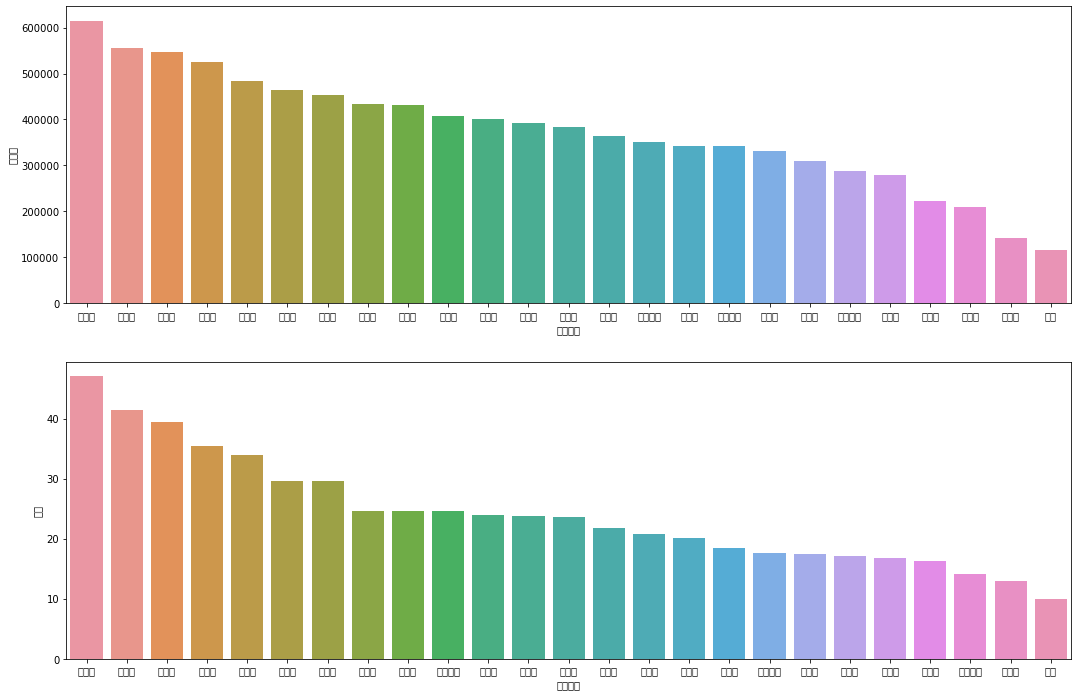

In [127]:
figure,(axes1,axes2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,12)
print(figure)
print(axes1)
print(axes2)
sns.barplot(x='행정구역', y='인구수', data=seoul_df.sort_values(by='인구수',ascending=False), ax=axes1)
sns.barplot(x='행정구역', y='면적', data=seoul_df.sort_values(by='면적',ascending=False), ax=axes2)

In [128]:
# 광역시도 이름을 인자로 받아서 인구수와 면적을 보여주는 barplot를 그려주는 함수 정의하기
def print_barplot(sido_name):
    sido_df = data.loc[data['광역시도'] == sido_name]
    figure,(axes1,axes2) = plt.subplots(nrows=2, ncols=1)
    figure.set_size_inches(18,12)
    pop_plot = sns.barplot(x='행정구역', y='인구수', data=sido_df.sort_values(by='인구수',ascending=False), ax=axes1)
    pop_plot.set_title(f'{sido_name} 행정구역별 인구수')
    area_plot = sns.barplot(x='행정구역', y='면적', data=sido_df.sort_values(by='면적',ascending=False), ax=axes2)
    area_plot.set_title(f'{sido_name} 행정구역별 면적')

/Users/kimeunbin/opt/anaconda3/envs/pythonProject/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  func(*args, **kwargs)
/Users/kimeunbin/opt/anaconda3/envs/pythonProject/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
/Users/kimeunbin/opt/anaconda3/envs/pythonProject/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/Users/kimeunbin/opt/anaconda3/envs/pythonProject/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  func(*args, **kwargs)
/Users/kimeunbin/opt/anaconda3/envs/pythonProject/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing fro

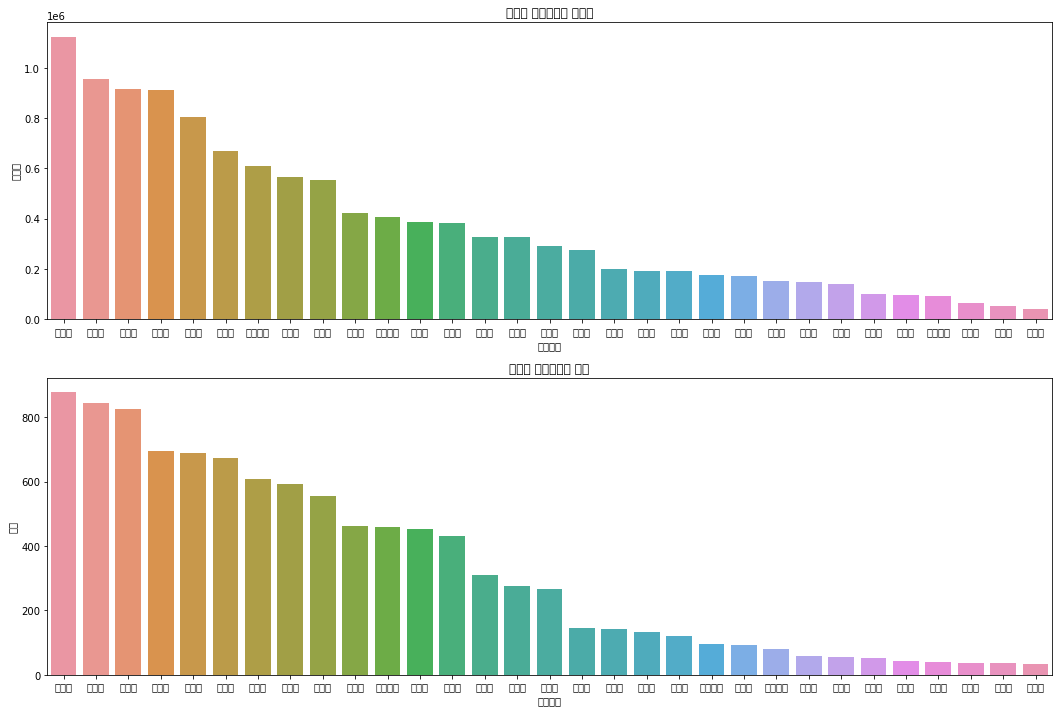

In [129]:
print_barplot('경기도')

<AxesSubplot:xlabel='광역시도', ylabel='인구수'>

/Users/kimeunbin/opt/anaconda3/envs/pythonProject/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
/Users/kimeunbin/opt/anaconda3/envs/pythonProject/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/Users/kimeunbin/opt/anaconda3/envs/pythonProject/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/Users/kimeunbin/opt/anaconda3/envs/pythonProject/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  func(*args, **kwargs)
/Users/kimeunbin/opt/anaconda3/envs/pythonProject/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from 

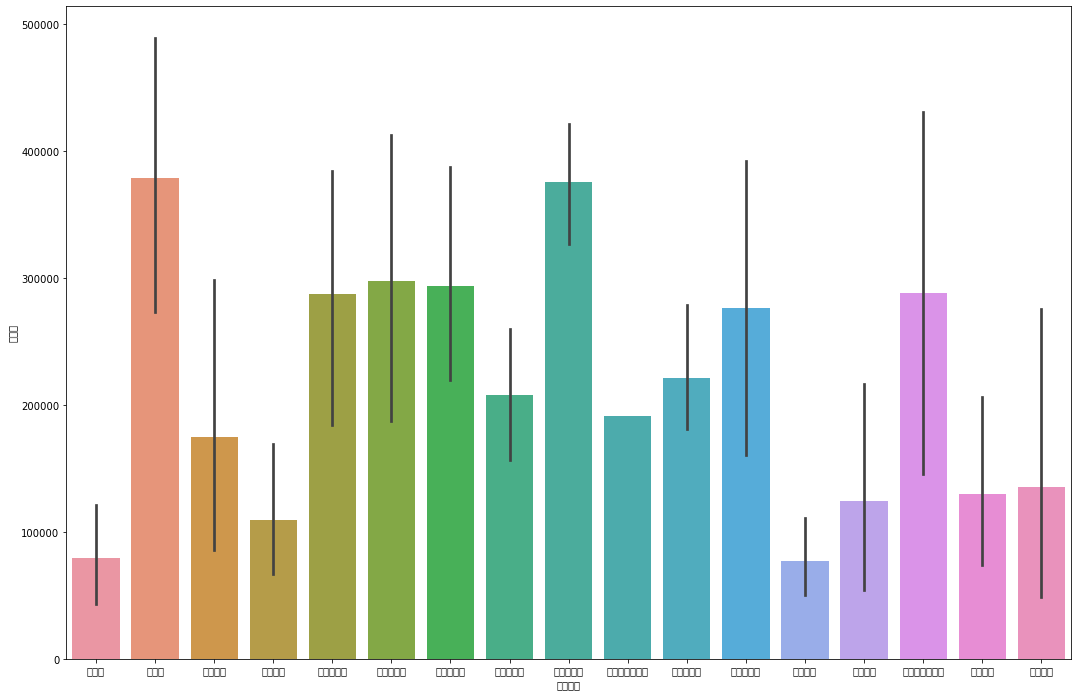

In [130]:
figure, axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)
sns.barplot(x='광역시도', y='인구수', data=data, ax=axes1)

In [131]:
for i, v in enumerate(seoul_df["인구수"].iteritems()):
    print(i, v[0],v[1])

0 124 526157
1 125 432028
2 126 310292
3 127 554709
4 128 484478
5 129 342909
6 130 401233
7 131 222566
8 132 547202
9 133 331682
10 134 342429
11 135 383917
12 136 364232
13 137 288543
14 138 407416
15 139 279939
16 140 434061
17 141 615487
18 142 453634
19 143 351837
20 144 208603
21 145 464236
22 146 140595
23 147 114967
24 148 391655


/var/folders/7d/9pfcr1bn2bl3ybstxw14zd1h0000gn/T/ipykernel_72279/2260474801.py:10: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  plt.tight_layout()
/var/folders/7d/9pfcr1bn2bl3ybstxw14zd1h0000gn/T/ipykernel_72279/2260474801.py:10: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  plt.tight_layout()
/var/folders/7d/9pfcr1bn2bl3ybstxw14zd1h0000gn/T/ipykernel_72279/2260474801.py:10: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  plt.tight_layout()
/var/folders/7d/9pfcr1bn2bl3ybstxw14zd1h0000gn/T/ipykernel_72279/2260474801.py:10: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  plt.tight_layout()
/var/folders/7d/9pfcr1bn2bl3ybstxw14zd1h0000gn/T/ipykernel_72279/2260474801.py:10: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  plt.tight_layout()
/var/folders/7d/9pfcr1bn2bl3ybstxw14zd1h0000gn/T/ipykernel_72279/2260474801.py:10: UserWa

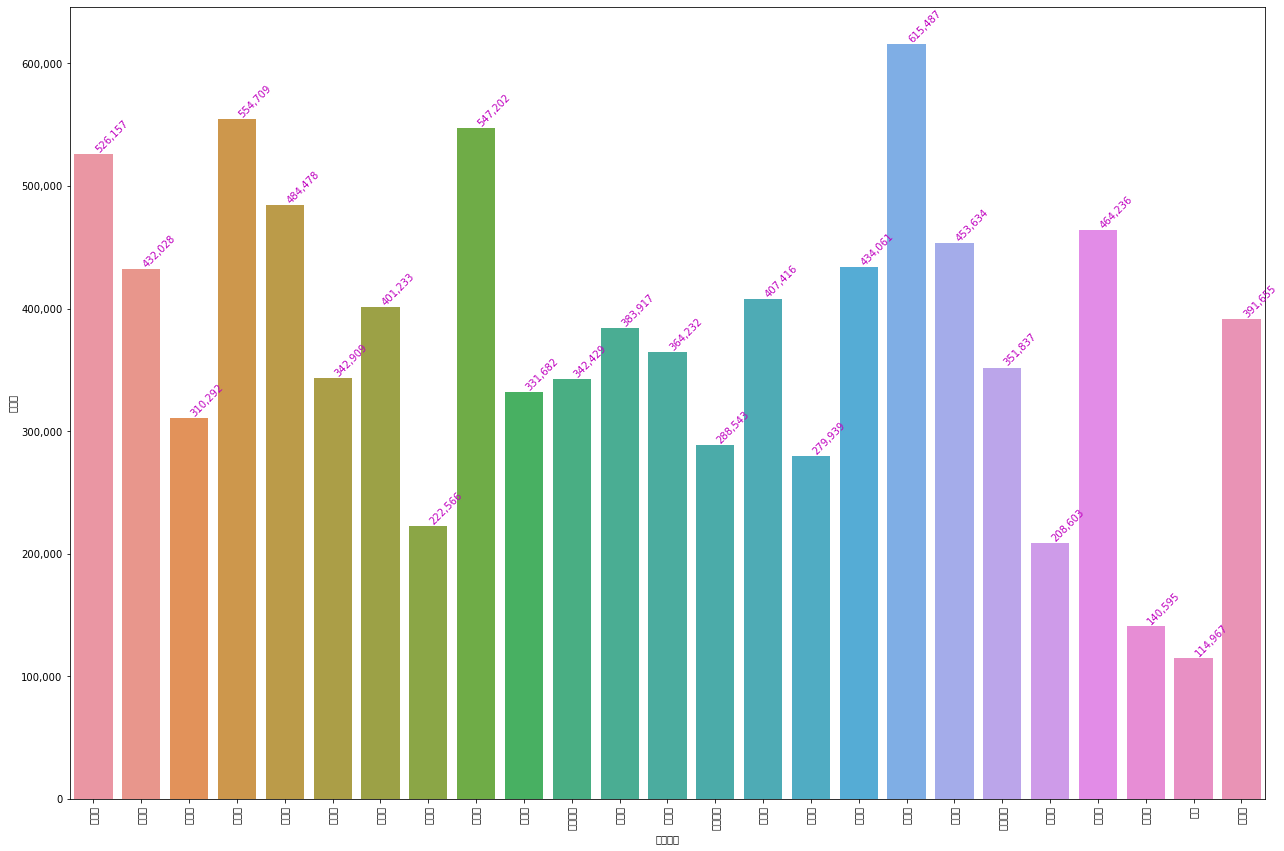

In [132]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)
sns.barplot(data=seoul_df, x="행정구역", y="인구수", ax=ax1)
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#ax1.set(ylabel='인구수')
for item in ax1.get_xticklabels():
    item.set_rotation(90)
for i, v in enumerate(seoul_df["인구수"].iteritems()):
    ax1.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()